In [12]:
from start_preprocessing import *
import numpy as np
import matplotlib.pyplot as plt

In [10]:
files = get_files("/net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled",".bmp","before2019" )

Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_03
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_04
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_05
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_01
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_02
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_06
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_07
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_08
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_09
Processing /net/projects/scratch/summer/valid_until_31_January_2020/asparagus/Images/unlabled/04_10


In [41]:
im = np.array(Image.open(files[300]))

In [71]:
Image.fromarray(im).save("deleteMe.bmp")

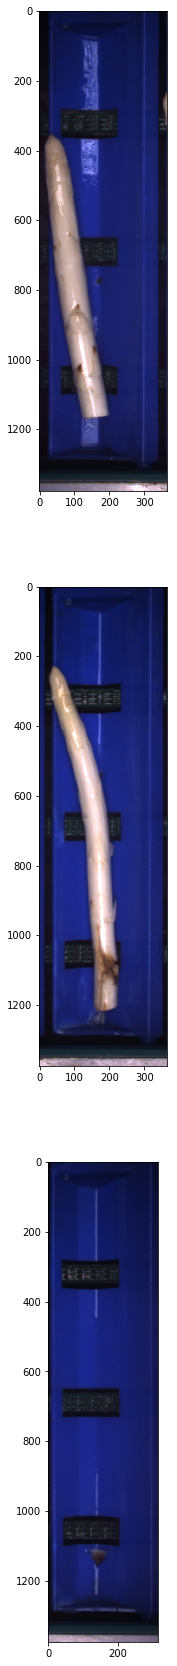

In [42]:
fig, ax = plt.subplots(3,figsize=(20,30))
width = 365file_id

left = 40
ax[0].imshow(im[:,left:left+width])

left = 365
ax[1].imshow(im[:,left:left+width])

left = 725
ax[2].imshow(im[:,left:left+width])



In [66]:
os.makedirs("/net/projects/scratch/summer/valid_until_31_January_2020/asparagus/deleteme/a/", exist_ok=True)

In [56]:
def preprocess(fpath1,fpath2,fpath3,outpath,file_id):    
    print(".",end="")
    sys.stdout.flush()
    
    os.makedirs(outpath, exist_ok=True)#Make dir if non existant
    
    imgs = []# open images
    imgs.append(Image.open(fpath1))
    imgs.append(Image.open(fpath2))
    imgs.append(Image.open(fpath3))
    
    outpaths = []#define outpaths
    outpaths.append[outpath+str(file_id)+"_a.bmp",outpath+str(file_id)+"_b.bmp",outpath+str(file_id)+"_c.bmp"]
    
    width = 365#width of snippet
    leftmost = [40,465,725]#offset of snippet from left

    for im, left, out in zip(imgs, leftmost, outpaths):
        snippet = im[:,left:left+width]#crop
        snippet = remove_background(im)
        Image.fromarray(snippet).save(out)


In [73]:
0%1000==0

True

In [43]:
def remove_background(img):
    raw = np.array(img)
    raw = raw[:,:,0:3]
    hsv = matplotlib.colors.rgb_to_hsv(raw)

    mask = np.logical_and(hsv[:,:,0]>0.4 , hsv[:,:,0]<0.8)#Mask all blue hues
    mask = np.logical_or(hsv[:,:,2]<100,mask)#Mask out values that are not bright engough
    
    #Use binary hit and miss to remove potentially remaining isolated pixels:
    m = np.logical_not(mask)
    change = 1
    while(change > 0):
        a = binary_hit_or_miss(m, [[ 0, -1,  0]]) + binary_hit_or_miss(m, np.array([[ 0, -1,  0]]).T)
        m[a] = False
        change = 1
        plt.imshow(a)
    
    mask = np.logical_not(m)
    raw[:,:,0][mask] = 0
    raw[:,:,1][mask] = 0
    raw[:,:,2][mask] = 0
    return raw